In [1]:
%matplotlib inline
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# ライブラリのimport
# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns

import pymc as pm
import arviz as az

# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 2.1.3 実装コード(ベルヌーイ分布)
### コード2.1 ベルヌーイ分布の確率モデル定義(p = 0.5)

In [3]:
p = 0.5
model1 = pm.Model()
with model1:
    # pm.Bernoulli:ベルヌーイ分布
    # p:くじに当たる確率
    x = pm.Bernoulli('x', p=p)

### コード2.3 事前分布のサンプリング

In [4]:
with model1:
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


### コード2.3 NumPy形式のサンプル値抽出

In [5]:
x_sample1 = prior_samples1['prior']['x'].values
print(x_sample1)

[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

### コード2.4 サンプリング結果の統計分析

In [6]:
summary1 = az.summary(prior_samples1, kind='stats')
display(summary1)

,mean,sd,hdi_3%,hdi_97%
x,0.512,0.500,0.000,1.000


### コード2.5 サンプリング結果の可視化

Text(0.5, 1.0, 'ベルヌーイ分布 p=0.5')

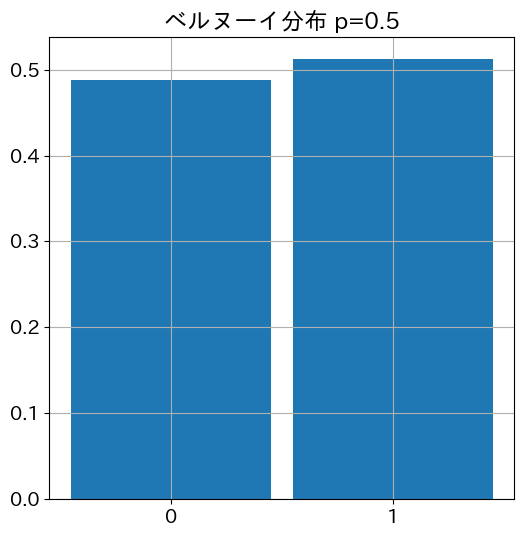

In [7]:
ax = az.plot_dist(x_sample1)
ax.set_title(f'ベルヌーイ分布 p={p}')

## 2.2.3 実装コード(二項分布)
### コード2.6 二項分布の確率モデル定義(p = 0.5, n = 5)

In [8]:
p = 0.5
n = 5

model2 = pm.Model()
with model2:
    # pm.Binomial:二項分布
    # n:試行回数
    # p:くじに当たる確率
    x = pm.Binomial('x', n=n, p=p)

### コード2.7 サンプリングと結果分析

Sampling: [x]


[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3 2 0 0 3 2 2 3 3 4 4 2 1 2 3 2 2 

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


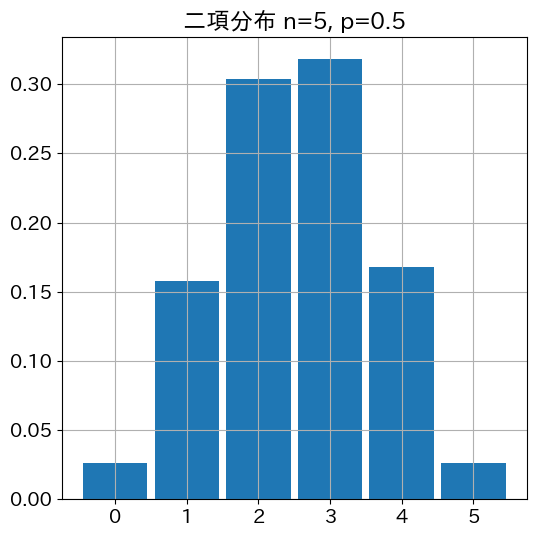

In [9]:
with model2:
    # サンプリング
    prior_samples2 = pm.sample_prior_predictive(random_seed=42)

    # サンプル値抽出
    x_samples2 = prior_samples2['prior']['x'].values
    print(x_samples2)

    # サンプリング結果の統計分析
    summary2 = az.summary(prior_samples2, kind='stats')
    display(summary2)

    # サンプリング結果の可視化
    ax = az.plot_dist(x_samples2)
    ax.set_title(f'二項分布 n={n}, p={p}')

### コード2.8 二項分布の確率モデル定義(p=0.5, n=50)サンプリング結果分析

Sampling: [x]


[[30 30 29 23 31 22 34 27 21 24 26 22 23 30 25 20 30 17 27 25 22 24 28 29
  20 26 21 26 27 28 23 26 20 26 28 27 18 29 27 19 22 29 26 21 27 28 23 19
  20 25 25 22 24 31 29 26 31 26 29 27 32 30 26 24 27 25 26 20 19 23 20 24
  19 21 26 25 25 28 26 28 20 20 27 26 22 24 24 25 25 26 25 22 20 27 24 18
  26 29 24 23 24 27 22 28 29 30 19 30 32 28 19 28 26 26 22 27 25 24 25 27
  23 26 27 30 30 20 28 26 28 26 27 30 26 32 28 26 27 23 31 27 26 23 28 26
  25 29 20 28 25 30 27 20 29 28 26 30 23 28 32 24 18 27 24 24 23 25 17 16
  24 20 25 30 21 24 26 22 27 27 28 26 23 21 25 24 22 30 23 26 26 22 24 24
  21 26 21 21 26 22 28 19 27 31 26 24 23 22 24 20 24 25 22 29 28 22 23 30
  27 25 28 23 17 25 26 31 28 27 29 24 27 26 24 25 27 22 29 25 20 26 23 29
  30 27 29 21 32 22 26 23 22 27 27 29 25 20 22 29 23 24 25 20 27 25 28 23
  24 31 22 24 24 29 25 22 26 25 28 25 24 27 21 22 22 24 19 29 27 34 19 26
  26 24 19 30 25 20 21 25 27 32 25 26 19 26 34 28 24 25 25 25 19 29 26 28
  28 27 26 25 23 21 24 24 22 25 30 22 

,mean,sd,hdi_3%,hdi_97%
x,24.998,3.456,18.000,30.000


Text(0.5, 1.0, '二項分布 n=50, p=0.5')

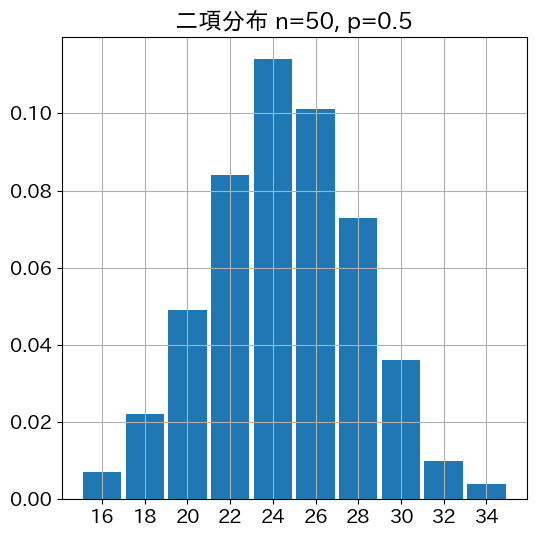

In [10]:
p = 0.5
n = 50

model3 = pm.Model()
with model3:
    # pm.Binomial:二項分布
    # n:試行回数
    # p:くじに当たる確率
    x = pm.Binomial('x', n=n, p=p)

    # サンプリング
    prior_samples3 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples3 = prior_samples3['prior']['x'].values
print(x_samples3)

# サンプリング結果の統計分析
summary3 = az.summary(prior_samples3, kind='stats')
display(summary3)

# サンプリング結果の可視化
ax = az.plot_dist(x_samples3)
ax.set_title(f'二項分布 n={n}, p={p}')

### コード2.9 アイリス・データセットから、setosaのがく片長(sapel_length)の分布

([<matplotlib.axis.XTick at 0x7faca24c4f10>,
 [Text(4.0, 0, '4.0'),
  Text(4.2, 0, '4.2'),
  Text(4.4, 0, '4.4'),
  Text(4.6000000000000005, 0, '4.6'),
  Text(4.800000000000001, 0, '4.8'),
  Text(5.000000000000001, 0, '5.0'),
  Text(5.200000000000001, 0, '5.2'),
  Text(5.400000000000001, 0, '5.4'),
  Text(5.600000000000001, 0, '5.6'),
  Text(5.800000000000002, 0, '5.8'),
  Text(6.000000000000002, 0, '6.0')])

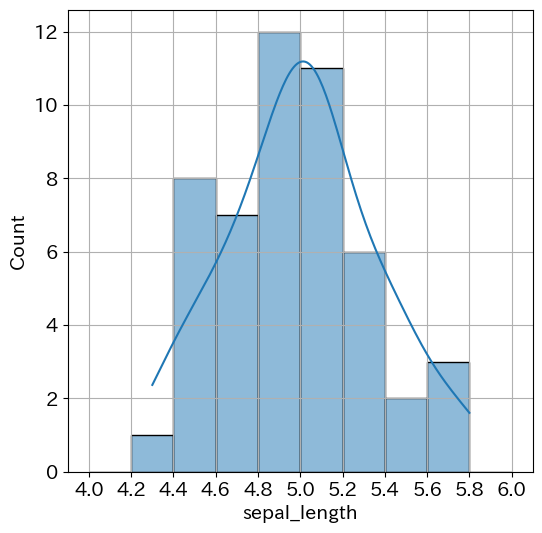

In [11]:
df = sns.load_dataset('iris')

df1 = df.query('species == "setosa"')

bins = np.arange(4.0, 6.2, 0.2)

sns.histplot(df1, x='sepal_length', bins=bins, kde=True)
plt.xticks(bins)

## 2.3.2 確率分布を示す数式
$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$
μ：平均 σ：標準偏差
### コード2.10 正規分布関数の定義とグラフ描画

Text(0.5, 1.0, '正規分布関数のグラフ')

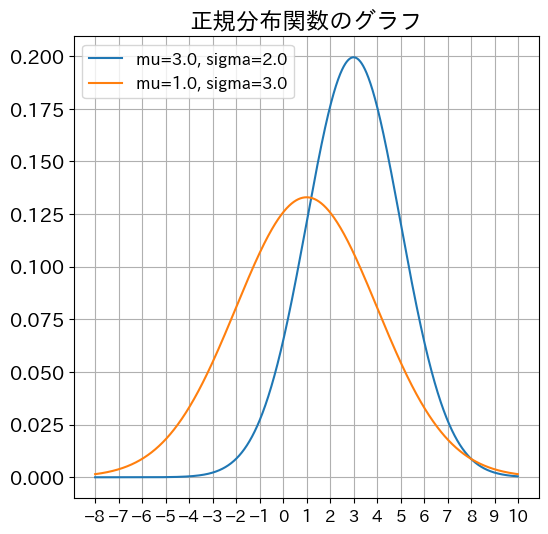

In [12]:
def norm(x, mu, sigma):
    return np.exp(-((x-mu)/sigma)**2 / 2) / (np.sqrt(2*np.pi) * sigma)

mu1, sigma1 = 3.0, 2.0
mu2, sigma2 = 1.0, 3.0

x = np.arange(-8.0, 10.0, 0.01)

xticks = np.arange(-8.0, 11.0, 1.0)

plt.plot(x, norm(x, mu1, sigma1), label=f'mu={mu1}, sigma={sigma1}')
plt.plot(x, norm(x, mu2, sigma2), label=f'mu={mu2}, sigma={sigma2}')
plt.xticks(xticks, fontsize=12)
plt.legend(fontsize=12)
plt.title(f"正規分布関数のグラフ")

### コード2.11 正規分布の確率モデル定義(mu=0.0,sigma=1.0)

In [13]:
mu = 0.0
sigma = 1.0

model4 = pm.Model()
with model4:
    x = pm.Normal('x', mu=mu, sigma=sigma)

### コード2.12 サンプリングとサンプリング結果の分析

Sampling: [x]


[[ 0.418  0.606  0.029 -1.084  1.464  0.291 -1.331 -0.035  0.280  0.107
  -1.921  1.579  1.006  0.451 -0.593  0.094  1.852 -0.256 -0.283  0.416
  -1.089 -1.967  0.887 -1.328 -0.132 -0.362  0.782  0.283 -1.006  0.019
  -1.243  2.603  0.151 -0.516 -0.220  0.402  1.361  0.743  0.937  0.175
   1.525  0.098 -1.165  0.524 -1.066 -0.311  0.556 -0.100 -0.258 -1.590
  -1.815  0.536  1.271 -0.554  1.724 -0.312  0.063  1.382  0.585 -0.510
   0.251  0.406  0.866 -0.534 -0.039  1.143 -0.464  2.267 -0.529  0.325
  -0.154 -0.820 -1.203  0.095 -1.362  0.277  0.307 -1.404 -1.539  1.597
   1.268 -0.744 -1.379 -0.373  0.225 -0.797 -0.190  0.405 -1.567  1.622
  -0.559  1.285 -0.649  0.642  2.170 -0.549  0.032 -0.744  1.306  0.870]]


Text(0.5, 1.0, '正規分布 mu=0.0, sigma=1.0')

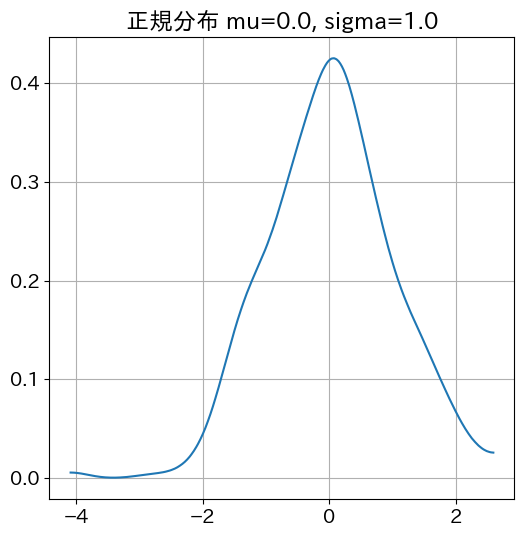

In [14]:
with model4:
    prior_samples4 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples4 = prior_samples4['prior']['x'].values
# 先頭100個
print(x_samples4[:,:100])

# サンプリング結果の可視化
ax = az.plot_dist(x_samples4)
ax.set_title(f'正規分布 mu={mu}, sigma={sigma}')

### コード2.13 サンプリング結果のヒストグラム表示

Text(0.5, 1.0, '正規分布 mu=0.0, sigma=1.0')

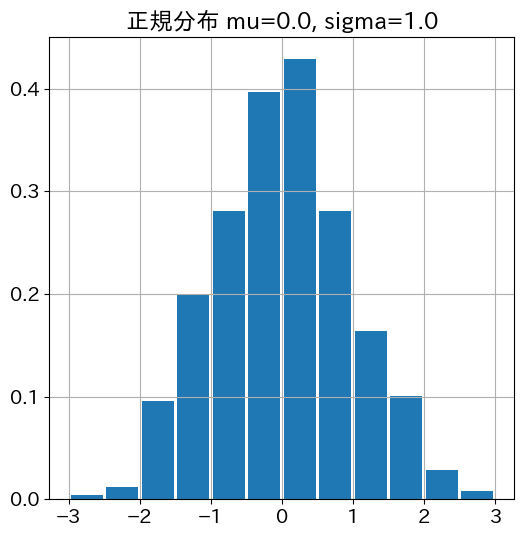

In [15]:
bins = np.arange(-3, 3.5, 0.5)
ax = az.plot_dist(x_samples4, kind='hist', hist_kwargs={'bins':bins})
plt.xticks(np.arange(-3, 4, 1))
ax.set_title(f'正規分布 mu={mu}, sigma={sigma}')

### コード2.14 サンプリング結果の統計分析

In [16]:
summary4 = az.summary(prior_samples4, kind='stats')
display(summary4)

,mean,sd,hdi_3%,hdi_97%
x,0.009,0.963,-1.590,1.900


### コード2.15 正規分布の確率モデル定義(mu=3.0, sigma=2.0)とサンプリング結果分析

Sampling: [x]


[[ 3.837  4.211  3.058  0.832  5.928  3.581  0.338  2.931  3.561  3.215
  -0.842  6.157  5.012  3.902  1.813  3.188  6.704  2.488  2.434  3.832
   0.822 -0.935  4.775  0.344  2.737  2.276  4.564  3.565  0.988  3.037
   0.514  8.207  3.303  1.969  2.561  3.805  5.723  4.486  4.874  3.351
   6.050  3.196  0.670  4.047  0.869  2.378  4.112  2.801  2.485 -0.179
  -0.630  4.072  5.543  1.892  6.449  2.376  3.127  5.764  4.169  1.980
   3.503  3.812  4.731  1.932  2.922  5.285  2.073  7.534  1.943  3.649
   2.691  1.361  0.594  3.191  0.277  3.555  3.613  0.192 -0.078  6.194
   5.537  1.511  0.242  2.254  3.450  1.406  2.620  3.810 -0.133  6.245
   1.883  5.570  1.702  4.285  7.341  1.902  3.064  1.511  5.611  4.740]]


Text(0.5, 1.0, '正規分布 mu=3.0, sigma=2.0')

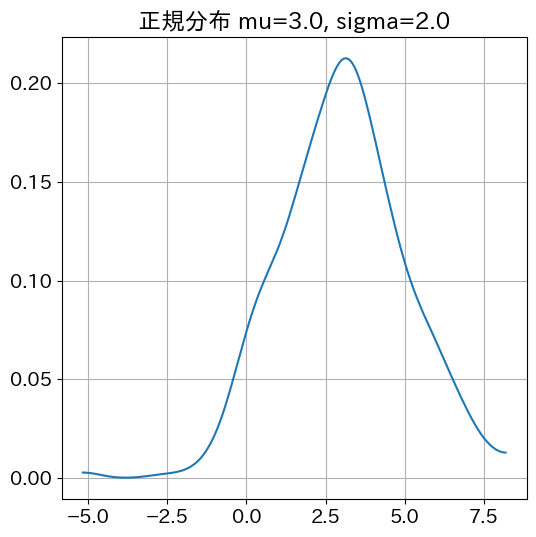

In [17]:
mu = 3.0
sigma = 2.0

model5 = pm.Model()
with model5:
    x = pm.Normal('x', mu=mu, sigma=sigma)
    prior_samples5 = pm.sample_prior_predictive(random_seed=42)

x_samples5 = prior_samples5['prior']['x'].values
print(x_samples5[:,:100])

ax = az.plot_dist(x_samples5)
ax.set_title(f'正規分布 mu={mu}, sigma={sigma}')

### コード2.16,17 一様分布の確率モデル定義とサンプリングと結果分析

Sampling: [x]


[[0.917 0.911 0.877 0.309 0.955 0.175 0.997 0.752 0.150 0.383 0.579 0.175
  0.249 0.928 0.450 0.080 0.929 0.015 0.745 0.508 0.161 0.427 0.810 0.851
  0.069 0.578 0.135 0.559 0.724 0.776 0.313 0.629 0.076 0.612 0.763 0.669
  0.018 0.894 0.681 0.058 0.213 0.882 0.621 0.136 0.728 0.789 0.318 0.037
  0.078 0.508 0.517 0.226 0.348 0.956 0.873 0.573 0.951 0.652 0.883 0.697
  0.983 0.929 0.646 0.409 0.709 0.553 0.627 0.078 0.042 0.248 0.068 0.389
  0.040 0.106 0.610 0.511 0.483 0.768 0.640 0.827 0.080 0.072 0.733 0.562
  0.195 0.413 0.392 0.450 0.510 0.663 0.474 0.235 0.078 0.695 0.373 0.022
  0.568 0.860 0.420 0.253]]


Text(0.5, 1.0, '一様分布 lower=0.0, upper=1.0')

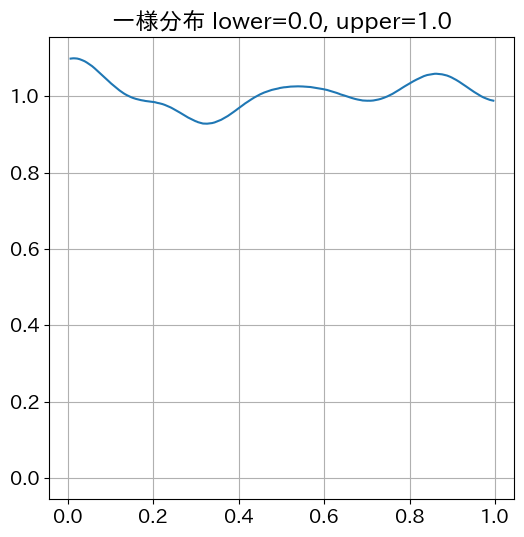

In [18]:
lower = 0.0
upper = 1.0

model6 = pm.Model()
with model6:
    x = pm.Uniform('x', lower=lower, upper=upper)
    prior_samples6 = pm.sample_prior_predictive(random_seed=42)

x_samples6 = prior_samples6['prior']['x'].values
print(x_samples6[:,:100])

ax = az.plot_dist(x_samples6)
ax.set_title(f'一様分布 lower={lower}, upper={upper}')

### コード2.18 サンプリング結果のヒストグラム表示

Text(0.5, 1.0, '一様分布 lower=0.0, upper=1.0')

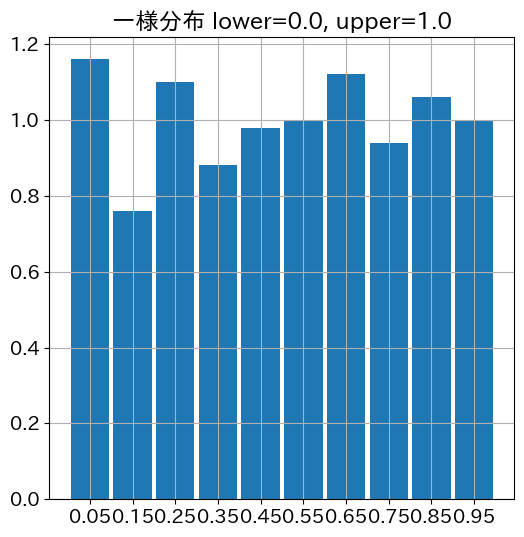

In [19]:
bins = np.arange(0.0, 1.1, 0.1)
ax = az.plot_dist(x_samples6, kind='hist', hist_kwargs={'bins':bins})
ax.set_title(f'一様分布 lower={lower}, upper={upper}')

### コード2.19 サンプリング結果の統計分析

In [20]:
summary6 = az.summary(prior_samples6, kind='stats')
display(summary6)

,mean,sd,hdi_3%,hdi_97%
x,0.502,0.289,0.037,0.956


### コード2.20 一様分布の確率モデル定義(下限値0.1 上限値0.9)とサンプリング結果分析

Sampling: [x]


[[0.833 0.829 0.801 0.347 0.864 0.240 0.897 0.702 0.220 0.407 0.563 0.240
  0.299 0.842 0.460 0.164 0.843 0.112 0.696 0.507 0.229 0.442 0.748 0.781
  0.156 0.563 0.208 0.547 0.679 0.721 0.350 0.603 0.161 0.590 0.710 0.635
  0.114 0.815 0.645 0.147 0.271 0.806 0.597 0.209 0.683 0.731 0.354 0.130
  0.162 0.507 0.514 0.281 0.378 0.865 0.798 0.558 0.861 0.622 0.806 0.657
  0.887 0.843 0.616 0.427 0.667 0.542 0.602 0.163 0.133 0.299 0.154 0.411
  0.132 0.184 0.588 0.509 0.487 0.715 0.612 0.762 0.164 0.157 0.687 0.550
  0.256 0.431 0.413 0.460 0.508 0.630 0.479 0.288 0.163 0.656 0.398 0.118
  0.555 0.788 0.436 0.303]]


Text(0.5, 1.0, '一様分布 lower=0.1, upper=0.9')

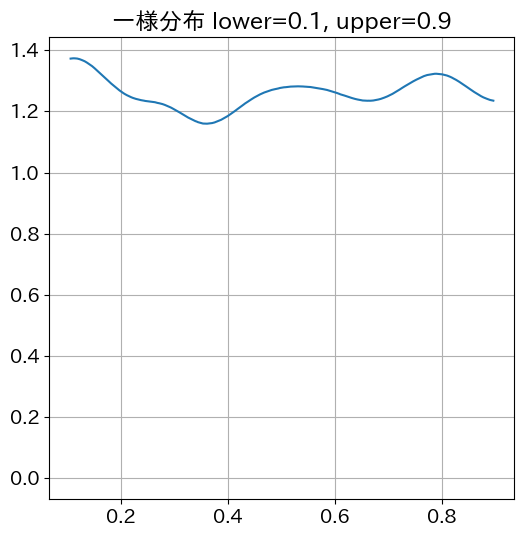

In [21]:
lower = 0.1
upper = 0.9

model7 = pm.Model()
with model7:
    x = pm.Uniform('x', lower=lower, upper=upper)
    prior_samples7 = pm.sample_prior_predictive(random_seed=42)

x_samples7 = prior_samples7['prior']['x'].values
print(x_samples7[:,:100])

ax = az.plot_dist(x_samples7)
ax.set_title(f'一様分布 lower={lower}, upper={upper}')

### コード2.21 ベータ関数グラフの描画

Text(0, 0.5, '尤度')

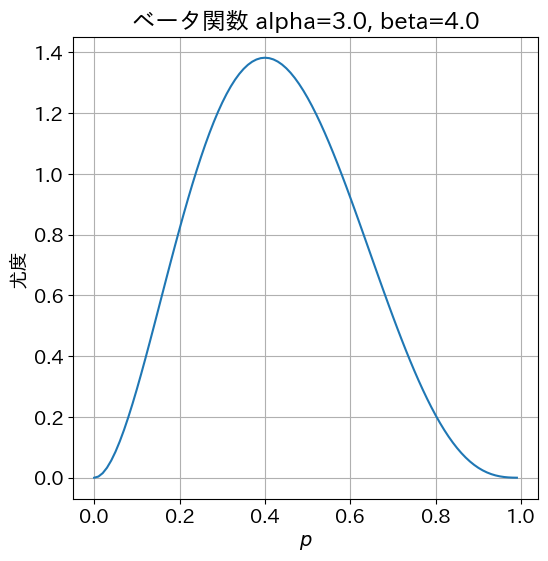

In [22]:
from math import gamma # 階乗を計算

alpha = 2.0 + 1.0
beta = 3.0 + 1.0

def Beta(p, alpha, beta):
    C = gamma(alpha + beta -1) / (gamma(alpha - 1)+gamma(beta - 1))
    return C * p** (alpha - 1) * (1-p) ** (beta - 1)

p = np.arange(0.0, 1.0, 0.01)

plt.plot(p, Beta(p, alpha, beta))
plt.title(f'ベータ関数 alpha={alpha}, beta={beta}')
plt.xlabel(r'$p$')
plt.ylabel('尤度')



### コード2.22 ベータ分布の確率モデル定義(alpha=3,beta=4)

In [24]:
# くじに2回当たって3回外れた
alpha = 2.0 + 1.0
beta = 3.0 + 1.0

model8 = pm.Model()
with model8:
    p = pm.Beta('p', alpha=alpha, beta=beta)

### コード2.23 サンプリングと結果分析

Sampling: [p]


[[0.478 0.778 0.745 0.639 0.689 0.182 0.314 0.431 0.472 0.491 0.764 0.209
  0.659 0.398 0.361 0.357 0.478 0.359 0.413 0.690 0.768 0.479 0.237 0.154
  0.286 0.583 0.231 0.492 0.248 0.549 0.377 0.435 0.635 0.457 0.690 0.563
  0.237 0.724 0.540 0.141 0.489 0.594 0.480 0.218 0.316 0.736 0.246 0.087
  0.447 0.532 0.362 0.203 0.189 0.300 0.219 0.576 0.309 0.381 0.670 0.196
  0.284 0.351 0.386 0.691 0.549 0.536 0.440 0.412 0.501 0.808 0.528 0.360
  0.485 0.374 0.588 0.266 0.662 0.469 0.620 0.299 0.840 0.284 0.672 0.734
  0.324 0.326 0.516 0.221 0.721 0.675 0.265 0.177 0.445 0.313 0.302 0.199
  0.483 0.575 0.528 0.389]]


Text(0.5, 1.0, 'ベータ分布 alpha=3.0, beta=4.0')

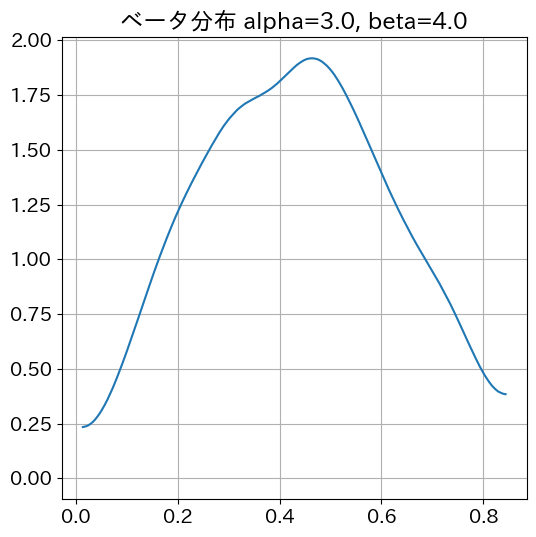

In [25]:
with model8:
    prior_samples8 = pm.sample_prior_predictive(random_seed=42)

p_samples8 = prior_samples8['prior']['p'].values
print(p_samples8[:,:100])

ax = az.plot_dist(p_samples8)
ax.set_title(f'ベータ分布 alpha={alpha}, beta={beta}')